# SQL

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.


### Задания

- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.




## Цели исследования

Проанализировать базу данных крупного сервиса для чтения книг по подписке и сформулировать ценностное предложение для нового продукта.

## Создаем подключение к базе данных

In [1]:
# импортируем библиотеки
import pandas as pd
import sqlalchemy as sa

In [3]:
# функция, которая выводит запрос
def get_sql_data(query:str, engine:sa.engine.base.Engine=engine) -> pd.DataFrame:
    '''Открываем соединение, получаем данные из sql, закрываем соединение'''
    with engine.connect() as con:
        return pd.read_sql(sql=sa.text(query), con=con)

In [4]:
# список таблиц
list_dfs = ['books', 'authors', 'publishers', 'ratings', 'reviews']

## Вывод первых 5 строк и схема взаимодействия таблиц

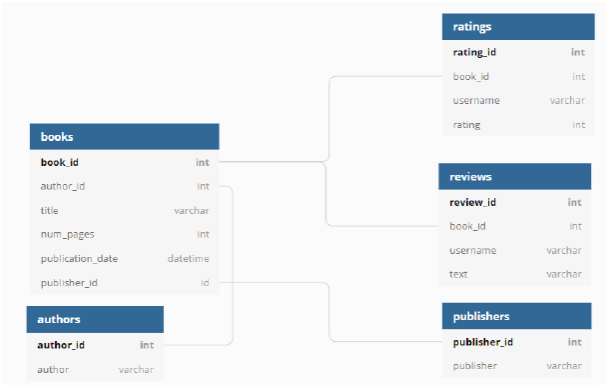

In [5]:
for df in list_dfs:
    print(f'Первые 5 строк таблицы {df}')
    print('---------------------------------------------------------------------------------')
    query= f'''
                SELECT *
                FROM {df}
                LIMIT 5;
    '''
    display(get_sql_data(query))
    print('---------------------------------------------------------------------------------')

Первые 5 строк таблицы books
---------------------------------------------------------------------------------


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


---------------------------------------------------------------------------------
Первые 5 строк таблицы authors
---------------------------------------------------------------------------------


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


---------------------------------------------------------------------------------
Первые 5 строк таблицы publishers
---------------------------------------------------------------------------------


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


---------------------------------------------------------------------------------
Первые 5 строк таблицы ratings
---------------------------------------------------------------------------------


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


---------------------------------------------------------------------------------
Первые 5 строк таблицы reviews
---------------------------------------------------------------------------------


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


---------------------------------------------------------------------------------


In [6]:
for df in list_dfs:
    print(f'Количество строк в таблице {df}')
    print('---------------------------------------------------------------------------------')
    query= f'''
                SELECT COUNT(*)
                FROM {df};
    '''
    display(get_sql_data(query))
    print('---------------------------------------------------------------------------------')

Количество строк в таблице books
---------------------------------------------------------------------------------


,count
0,1000


---------------------------------------------------------------------------------
Количество строк в таблице authors
---------------------------------------------------------------------------------


,count
0,636


---------------------------------------------------------------------------------
Количество строк в таблице publishers
---------------------------------------------------------------------------------


,count
0,340


---------------------------------------------------------------------------------
Количество строк в таблице ratings
---------------------------------------------------------------------------------


,count
0,6456


---------------------------------------------------------------------------------
Количество строк в таблице reviews
---------------------------------------------------------------------------------


,count
0,2793


---------------------------------------------------------------------------------


## Сколько книг вышло после 1 января 2000 года

In [7]:
query1 = '''
            SELECT COUNT(DISTINCT book_id) as cnt_books
            FROM books
            WHERE publication_date >= '2000-01-01'
'''

In [8]:
get_sql_data(query1)

,cnt_books
0,821


In [9]:
#рассмотрим какое количество книг было выпущено в год исходя из условий что сейчас год Коронавируса
print('Количество книг в год:', round(821 / 21))
print('Количество книг в месяц:', round(821 / 21 / 12))

Количество книг в год: 39
Количество книг в месяц: 3


Выпускаемое количество книг довольно небольшое, предположу, что это сервис, который специализируется на определенной категории книг.

## Для каждой книги посчитайте количество обзоров и среднюю оценку

In [10]:
query2 = '''
            SELECT distinct b.book_id, 
                   b.title,
                   COUNT(distinct v.review_id) AS cnt_reviews, 
                   ROUND(AVG(r.rating),2) AS avg_ratings
            FROM books AS b
            LEFT JOIN reviews AS v ON b.book_id=v.book_id
            LEFT JOIN ratings AS r ON b.book_id=r.book_id 
            GROUP BY b.book_id;
            
'''

In [11]:
get_sql_data(query2)

,book_id,title,cnt_reviews,avg_ratings
0,734,The Glass Castle,6,4.21
1,204,Dry,3,4.33
2,36,A Moveable Feast,3,4.67
3,163,Corelli's Mandolin,3,3.00
4,801,The Monster at the End of this Book,3,4.75
...,...,...,...,...
995,800,The Monk Who Sold His Ferrari: A Fable About F...,3,4.33
996,538,Reaper Man (Discworld #11; Death #2),2,3.67
997,802,The Moon is a Harsh Mistress,3,3.75
998,241,Farmer Boy (Little House #2),2,4.50


In [12]:
df_book_ratings = get_sql_data(query2).sort_values(by=['cnt_reviews', 'avg_ratings'], ascending=False)
df_book_ratings.head(10)

,book_id,title,cnt_reviews,avg_ratings
340,948,Twilight (Twilight #1),7,3.66
130,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.41
771,299,Harry Potter and the Chamber of Secrets (Harry...,6,4.29
267,656,The Book Thief,6,4.26
0,734,The Glass Castle,6,4.21
112,750,The Hobbit or There and Back Again,6,4.13
374,497,Outlander (Outlander #1),6,4.13
204,779,The Lightning Thief (Percy Jackson and the Oly...,6,4.08
942,695,The Curious Incident of the Dog in the Night-Time,6,4.08
184,963,Water for Elephants,6,3.98


In [13]:
df_book_ratings.describe()

,book_id,cnt_reviews,avg_ratings
count,1000.000000,1000.000000,1000.000000
mean,500.500000,2.793000,3.899040
std,288.819436,1.074852,0.562388
min,1.000000,0.000000,1.500000
25%,250.750000,2.000000,3.500000
50%,500.500000,3.000000,4.000000
75%,750.250000,3.000000,4.330000
max,1000.000000,7.000000,5.000000


- средние оценки приемлемые, 3.9 из максимальных 5
- количество обзоров довольно маленькое, не больше 7 даже для книг бесцеллеров например Гарри Поттер). Лидер по количеству обзоров книга Сумерки.

## Определите издательство, которое выпустило наибольшее число книг толще 50 страниц 

In [14]:
query3 = '''
            SELECT p.publisher, COUNT(DISTINCT b.title) AS cnt_books
            FROM books AS b
            JOIN publishers AS p ON b.publisher_id=p.publisher_id
            WHERE num_pages > 50
            GROUP BY p.publisher_id
            ORDER BY cnt_books DESC
            LIMIT 5;
            
'''

In [15]:
get_sql_data(query3)

,publisher,cnt_books
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Ballantine Books,19


Топ-2 издательства из Англии, а уже на третьем месте издательство США.

## Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [16]:
query4 = '''
            WITH atc AS (
            SELECT a.author, r.rating,
                   COUNT(r.rating_id) OVER(PARTITION BY b.book_id) as cnt_rating
            FROM books AS b
            JOIN ratings AS r ON b.book_id=r.book_id
            JOIN authors AS a ON b.author_id=a.author_id
            )
            
            SELECT author, AVG(rating) AS avg_rating
            FROM atc
            WHERE cnt_rating >= 50
            GROUP BY author
            ORDER BY avg_rating DESC
            LIMIT 1;
            
'''

In [17]:
get_sql_data(query4)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.287097


Гарри поттер forever 😂

## Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок

In [18]:
query5 = '''
            WITH user_48r AS (
            SELECT username 
            FROM ratings 
            GROUP BY username
            HAVING COUNT(rating_id) > 48
            ),
            
            user_rev_cnt AS (
            SELECT DISTINCT u.username,
                   COUNT(r.review_id) OVER (PARTITION BY r.username) AS cnt_rewiews
            FROM user_48r  AS u
            JOIN reviews AS r ON r.username=u.username
            )
            
            SELECT ROUND(AVG(cnt_rewiews),1) AS avg_rewiews
            FROM user_rev_cnt
              
'''

In [19]:
get_sql_data(query5)

,avg_rewiews
0,24.0


Данный факт свидетельствует о хорошем уровне активности пользователей. 

## Вывод

Сервис выделяется качетсвом публикуемого контента, имеет низкие стартовые показатели активности аудитории и исходя из списка издательств имеет англоговорящую направленность.

Хорошие показатели отчасти связаны с грамотным подбором и малым количеством публикуемых книг, сервис имеет потенциал масштабирования. 

В качестве реккомендаций можно предложить увеличить количество публикуемых книг, расширить жанровую и языковую направленность.